# packages

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [169]:
def split_and_expand(row):
    """Split a string data accross coma
    """
    return pd.Series(row.split(','))   

def raw_data_to_dataframe(df_unseparated):
    """From a raw DataFrame returns a clean DataFrame separated on the coma.
    """ 

    columns_name = df_unseparated.columns[0].split(',')

    values = df_unseparated['Date,Open,High,Low,Close,Adj Close,Volume'].apply(split_and_expand).values

    return pd.DataFrame(values, columns=columns_name)

def df_of_aggregated_data(df_raw):
    """From Yahoo.fr export, returns a dataframe with the asset as ticker.
    """
    df_aggregated = pd.DataFrame()

    for indice in list(df_raw.keys()):
        df_raw[indice] = raw_data_to_dataframe(df_raw[indice])
        # Add the ticker on the dataframe
        df_raw[indice]['Ticker'] = [indice]*len(df_raw[indice])
        # concat all the data frame
        df_aggregated = pd.concat([df_aggregated, df_raw[indice]], axis=0)

    return df_aggregated.set_index('Date')


def convert_index_to_datetime(df):
    """
    Convert the index of a DataFrame from a string date format (YYYY-MM-DD) to datetime format.
    
    Parameters:
    - df: pandas DataFrame
    
    Returns:
    - pandas DataFrame with the index converted to datetime format
    """
    # Check if the DataFrame has an index
    if not isinstance(df.index, pd.DatetimeIndex):
        # Convert the index to datetime format
        df.index = pd.to_datetime(df.index)
    
    return df
    
def transform_df_with_str_values_into_float(df, columns_to_change):
    df[columns_to_change] = df[columns_to_change].apply(pd.to_numeric, errors='coerce')
    return df

def crop_dataframe(df, begin_date='1000-01-01', end_date='3000-01-01', all_dates=False):
    """
    Crop a DataFrame between two specified dates, keeping all occurrences of the dates if specified.

    Parameters:
    - df: pandas DataFrame
    - begin_date: str, format 'YYYY-MM-DD'
    - end_date: str, format 'YYYY-MM-DD'
    - all_dates: bool, if True, keep all data, regardless of the date interval (default: False)

    Returns:
    - pandas DataFrame cropped between begin_date and end_date (or the original DataFrame if all_dates is True)
    """
    # If all_dates is True, return the original DataFrame
    if all_dates:
        return df
    
    else:
        # Convert input dates to datetime format
        begin_date = pd.to_datetime(begin_date)
        end_date = pd.to_datetime(end_date)

        # Boolean indexing to keep all occurrences of dates within the specified interval
        cropped_df = df[(df.index >= begin_date) & (df.index <= end_date)]

        return cropped_df


# Download and clean data

In [153]:
data_path = "/Users/antoine/Documents/GitHub/Allocation_de_portefeuille_sous_contrainte_ESG/data/StockPrice_JPM_AAPL_BP.xlsx"

In [164]:
df = pd.read_excel(data_path, sheet_name=None)
df_aggregated = df_of_aggregated_data(df)
df_aggregated_in_datetime = convert_index_to_datetime(df_aggregated)
df_clean = transform_df_with_str_values_into_float(df_aggregated_in_datetime, columns_to_change = df_aggregated_in_datetime.columns.drop('Ticker'))

In [165]:
df_clean

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
1985-01-01,0.130022,0.138951,0.124442,0.129464,0.100314,6366416000,AAPL
1985-02-01,0.129464,0.137277,0.110491,0.110491,0.085613,4733388800,AAPL
1985-03-01,0.110491,0.116071,0.092634,0.098772,0.076533,4615587200,AAPL
1985-04-01,0.098772,0.102679,0.087612,0.094866,0.073506,2868028800,AAPL
1985-05-01,0.094866,0.099330,0.075335,0.077567,0.060102,4639129600,AAPL
...,...,...,...,...,...,...,...
2023-07-01,146.190002,159.380005,141.440002,157.960007,155.733475,231241600,JPM
2023-08-01,157.429993,158.000000,145.460007,146.330002,145.258163,169302400,JPM
2023-09-01,146.089996,150.250000,142.649994,145.020004,143.957764,172196500,JPM


# Plot index evolution

In [170]:
value_to_plot = 'Adj Close'
begin_date = '2020-01-01'
end_date = '2023-12-01'

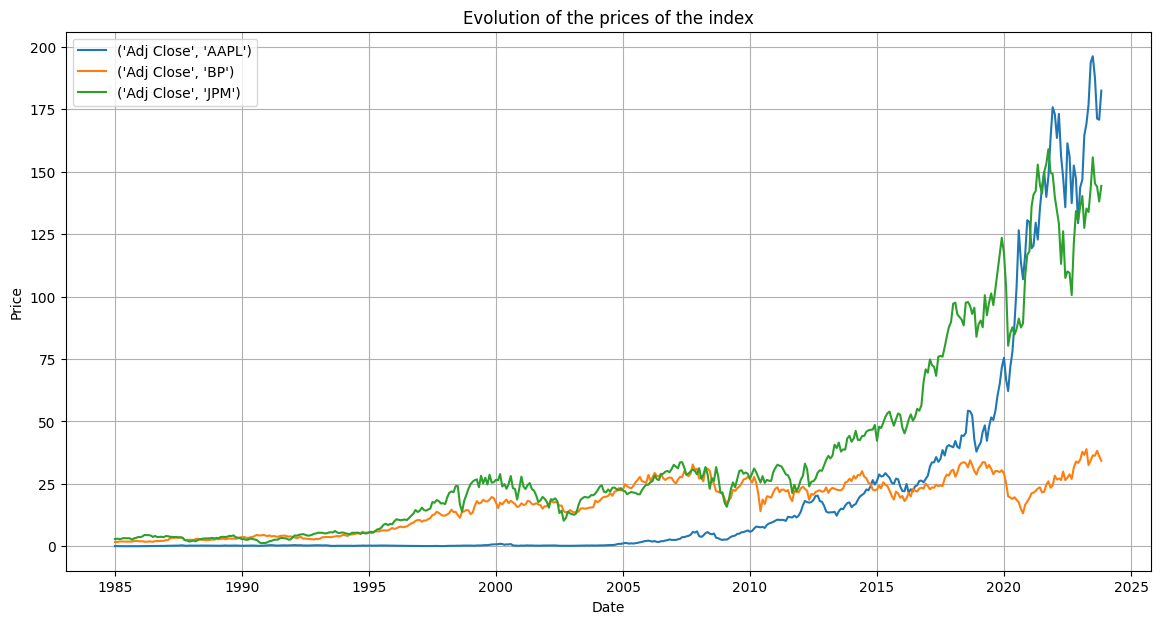

In [174]:
# df_cropped = crop_dataframe(df_clean, begin_date, end_date, all_dates=False)

df_cropped = crop_dataframe(df_clean, all_dates=True)


table = df_cropped[[value_to_plot,'Ticker']].pivot(columns='Ticker')

plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c],label=c)
plt.legend()
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Evolution of the prices of the index')
plt.show()